___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country the customer is from
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
# Check python version
!python --version

Python 3.11.5


In [3]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

In [4]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

from ipywidgets import interact

#To display the plots
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio

import plotly.express as px
import cufflinks as cf

In [6]:
df=pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [10]:
# let's drop columns that are not useful

df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [11]:
# checking for missing values

df.isnull().sum().any()

# there are none

False

In [12]:
@interact(col=df.select_dtypes(include='number').columns, chart=["countplot", "histogram"])
def plot(col, chart):
    colors = np.random.choice(['blue', 'red', 'green'])
    if chart == "countplot":
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    else:
        plt.figure(figsize=(20, 5))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

interactive(children=(Dropdown(description='col', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfPr…

In [13]:
cf.go_offline()

def column_boxer(col):
    df[col].iplot("box", color="black", boxpoints="all")


cols = df.drop(["Gender", "Geography"], axis=1).columns
interact(column_boxer, col=cols);

interactive(children=(Dropdown(description='col', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfPr…

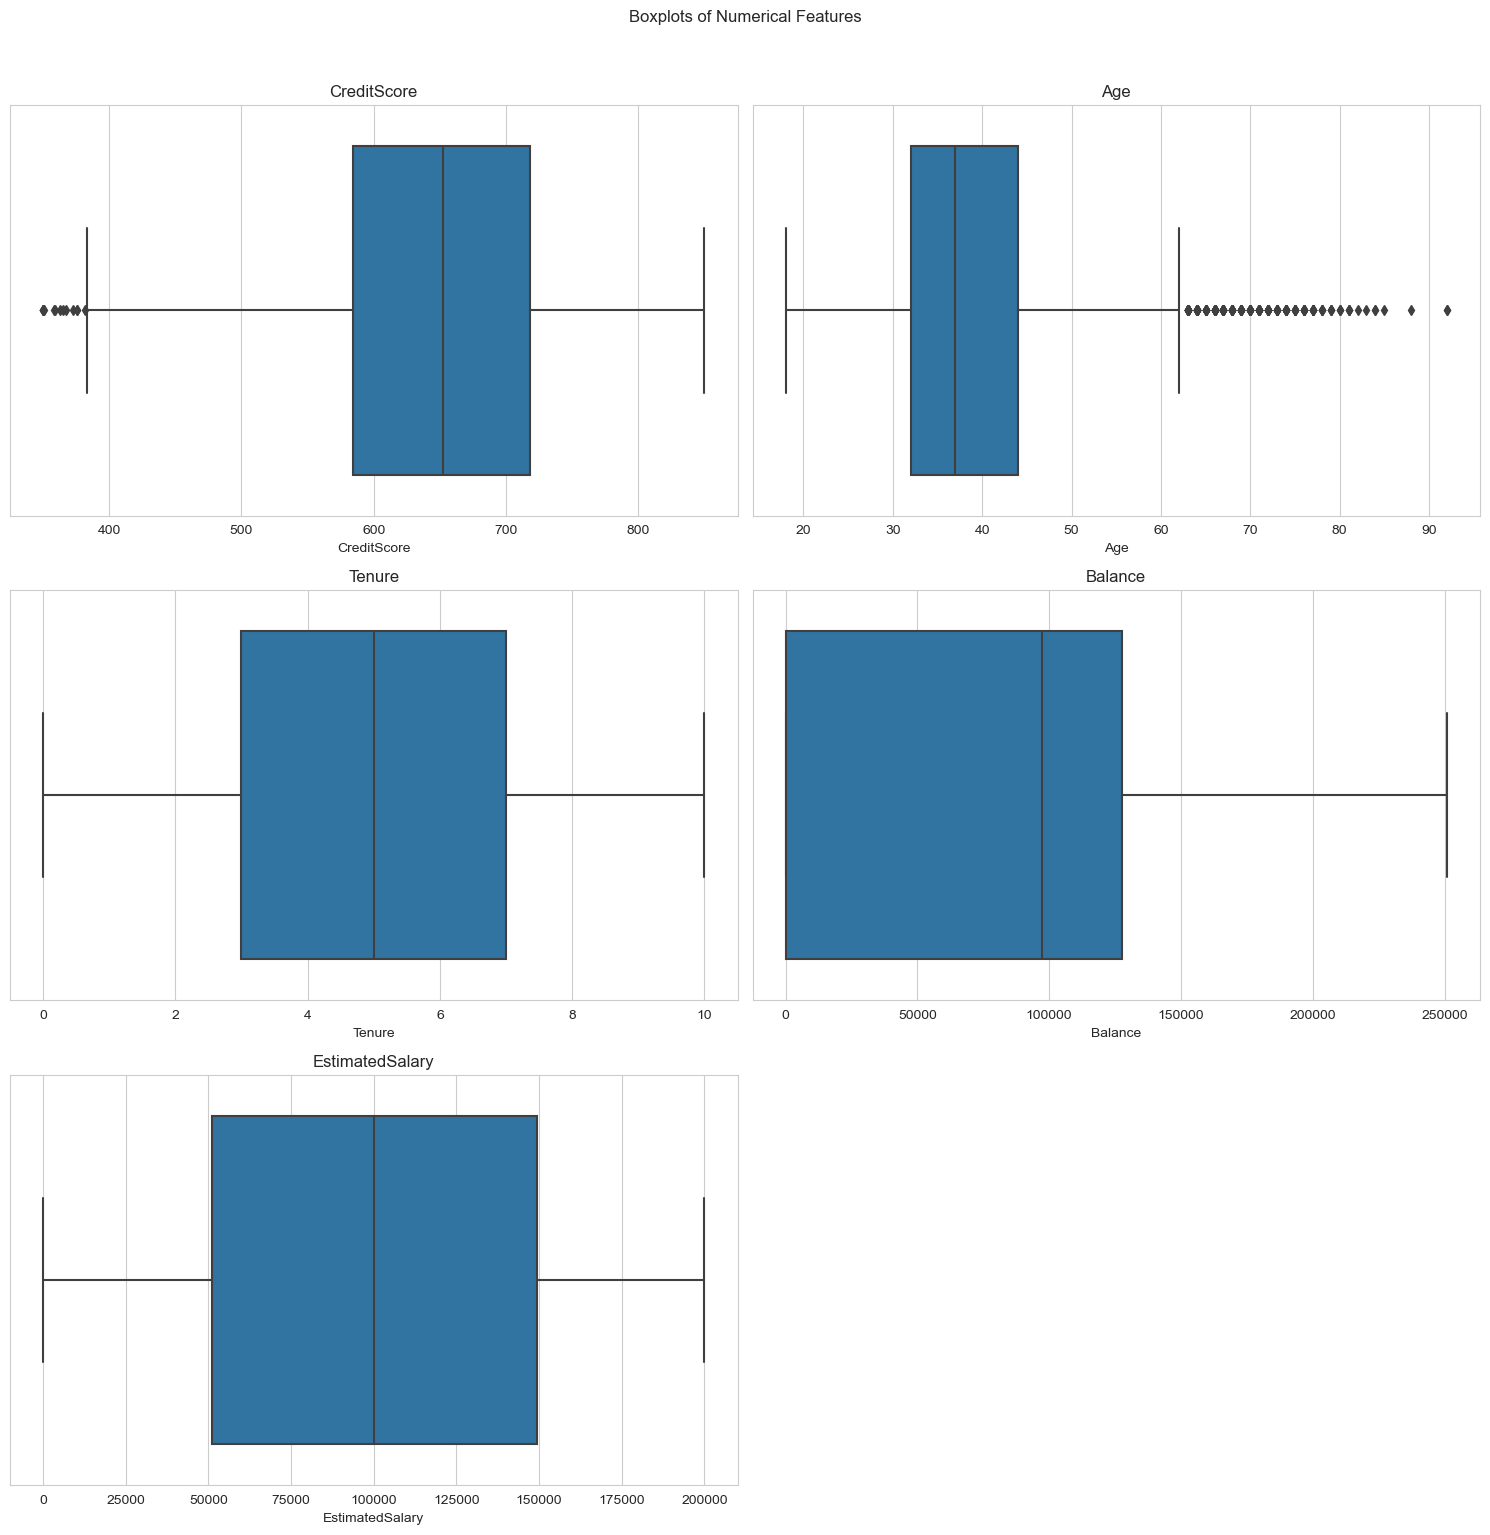

In [14]:

from math import ceil

# Selecting numerical features
numerical_cols = df[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]].columns

# Calculate the number of rows needed based on the number of numerical features
num_rows = ceil(len(numerical_cols) / 2)

# Create subplots with a 2-column grid layout
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), sharey=True)
fig.suptitle('Boxplots of Numerical Features', y=1.02)

# Plot boxplots for each numerical feature
for i, col in enumerate(numerical_cols):
    row_idx = i // 2
    col_idx = i % 2
    sns.boxplot(x=df[col], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)

# Remove empty subplots if the number of features is odd
if len(numerical_cols) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()


In [15]:
# There are two categorical features of interest that are  : geography and gender

df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

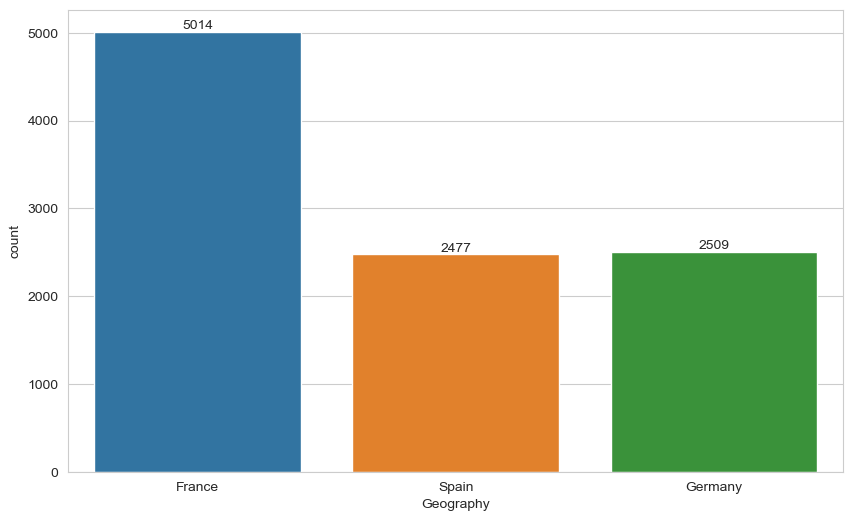

In [16]:
ax = sns.countplot(x=df["Geography"])
ax.bar_label(ax.containers[0]);

In [17]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

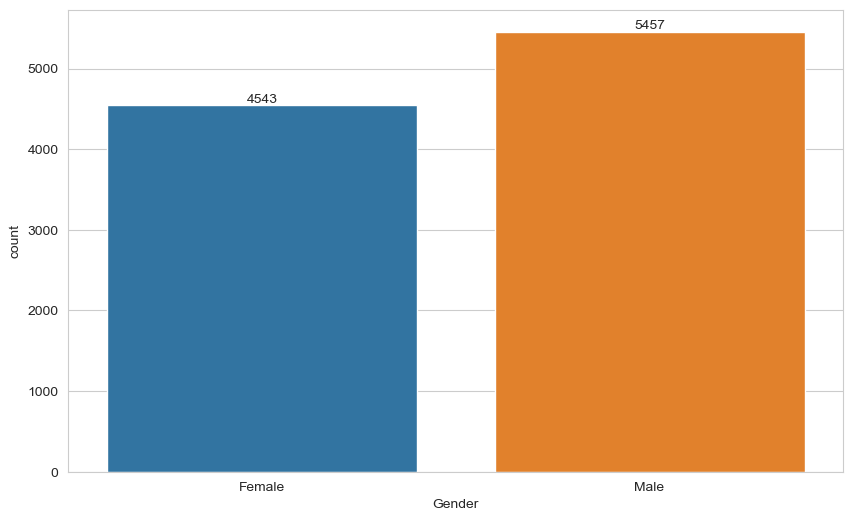

In [18]:
ax = sns.countplot(x=df["Gender"])
ax.bar_label(ax.containers[0]);

In [19]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

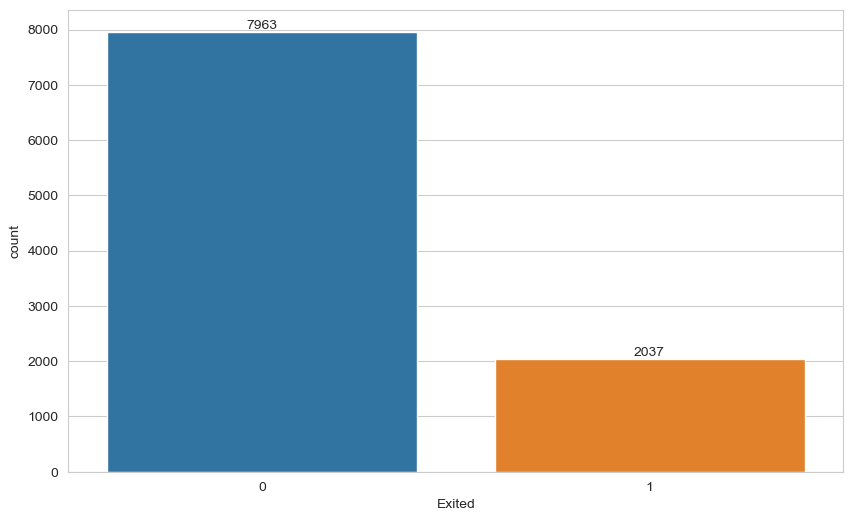

In [20]:
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0]);

In [21]:
# We have an imbalanced dataset

In [22]:
crosstab = pd.crosstab(df["Exited"], df["Gender"], normalize='columns')
print(crosstab)

# Females are more likely to churn than males

Gender  Female  Male
Exited              
0        0.749 0.835
1        0.251 0.165


In [23]:
crosstab = pd.crosstab(df["Exited"], df["Geography"], normalize='columns')
print(crosstab)

# Those from Germany are more likely to churn

Geography  France  Germany  Spain
Exited                           
0           0.838    0.676  0.833
1           0.162    0.324  0.167


In [24]:
def column_pair(col1,col2):
    sns.pairplot(df,
                 vars=[col1,col2],
                 hue="Exited",
                 height= 2,
                 aspect= 2,
                 palette='Dark2')
cols1 = df.columns
cols2 = df.columns
interact(column_pair, col1=cols1, col2=cols2);

interactive(children=(Dropdown(description='col1', options=('CreditScore', 'Geography', 'Gender', 'Age', 'Tenu…

In [25]:
df.corr(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


<Axes: >

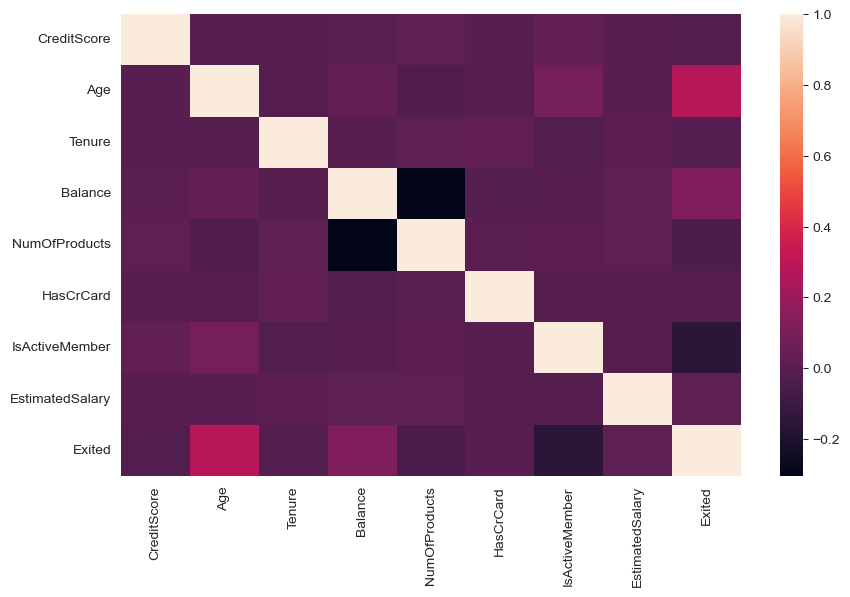

In [26]:
sns.heatmap(df.corr(numeric_only=True))

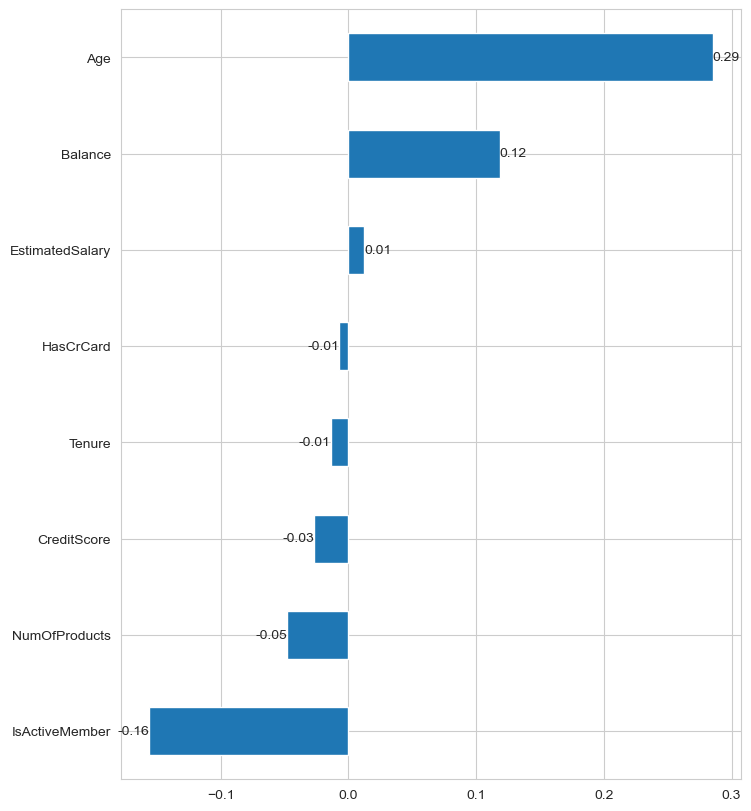

In [27]:
# correlation of features with the target feature

plt.figure(figsize=(8, 10))
ax=df.drop(["Geography", "Gender"], axis=1).corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.show()

In [28]:
# Label encoding Gender
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Male'] = label_encoder.fit_transform(df['Gender'])
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0,1
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0,1
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1,0
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1,1


In [29]:
# drop original Gender and move Male so that Exited (the target feature) is at index -1

df.drop("Gender", axis=1, inplace=True)
df = df[['Male', 'CreditScore', 'Geography', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']]
df

,Male,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,France,42,2,0.000,1,1,1,101348.880,1
1,0,608,Spain,41,1,83807.860,1,0,1,112542.580,0
2,0,502,France,42,8,159660.800,3,1,0,113931.570,1
3,0,699,France,39,1,0.000,2,0,0,93826.630,0
4,0,850,Spain,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,771,France,39,5,0.000,2,1,0,96270.640,0
9996,1,516,France,35,10,57369.610,1,1,1,101699.770,0
9997,0,709,France,36,7,0.000,1,0,1,42085.580,1
9998,1,772,Germany,42,3,75075.310,2,1,0,92888.520,1


In [30]:
 # Onehot encoding Geography

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop=None)
geography_encoded = encoder.fit_transform(df[['Geography']])
column_names = [f'{category}' for category in encoder.get_feature_names_out(['Geography'])]

geography_encoded_df = pd.DataFrame(geography_encoded, columns=column_names)

df = pd.concat([geography_encoded_df, df], axis=1)

df.drop("Geography", axis=1, inplace=True)

In [31]:
df

,Geography_France,Geography_Germany,Geography_Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.000,0.000,0.000,0,619,42,2,0.000,1,1,1,101348.880,1
1,0.000,0.000,1.000,0,608,41,1,83807.860,1,0,1,112542.580,0
2,1.000,0.000,0.000,0,502,42,8,159660.800,3,1,0,113931.570,1
3,1.000,0.000,0.000,0,699,39,1,0.000,2,0,0,93826.630,0
4,0.000,0.000,1.000,0,850,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.000,0.000,0.000,1,771,39,5,0.000,2,1,0,96270.640,0
9996,1.000,0.000,0.000,1,516,35,10,57369.610,1,1,1,101699.770,0
9997,1.000,0.000,0.000,0,709,36,7,0.000,1,0,1,42085.580,1
9998,0.000,1.000,0.000,1,772,42,3,75075.310,2,1,0,92888.520,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop('Exited', axis=1)
y = df["Exited"]

In [34]:
X

,Geography_France,Geography_Germany,Geography_Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.000,0.000,0.000,0,619,42,2,0.000,1,1,1,101348.880
1,0.000,0.000,1.000,0,608,41,1,83807.860,1,0,1,112542.580
2,1.000,0.000,0.000,0,502,42,8,159660.800,3,1,0,113931.570
3,1.000,0.000,0.000,0,699,39,1,0.000,2,0,0,93826.630
4,0.000,0.000,1.000,0,850,43,2,125510.820,1,1,1,79084.100
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.000,0.000,0.000,1,771,39,5,0.000,2,1,0,96270.640
9996,1.000,0.000,0.000,1,516,35,10,57369.610,1,1,1,101699.770
9997,1.000,0.000,0.000,0,709,36,7,0.000,1,0,1,42085.580
9998,0.000,1.000,0.000,1,772,42,3,75075.310,2,1,0,92888.520


In [35]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

In [37]:
X_train.shape

(8000, 12)

In [38]:
X_test.shape

(2000, 12)

In [39]:
y_train.shape

(8000,)

In [40]:
y_test.shape

(2000,)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [44]:
import tensorflow as tf

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [46]:
X_train.shape

(8000, 12)

In [47]:
model = Sequential()

model.add(Dense(18, activation="relu", input_dim=X_train.shape[1])) # 12 * 1.5 =  18
model.add(Dense(9, activation="relu")) # 18/2
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=250, verbose=1
)
# tried epochs=1000 and result was an overfit

Epoch 1/250
57/57 [==============================] - 2s 6ms/step - loss: 0.6253 - accuracy: 0.7325 - val_loss: 0.5411 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7947 - val_loss: 0.4905 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7947 - val_loss: 0.4758 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.7947 - val_loss: 0.4647 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.7947 - val_loss: 0.4507 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7946 - val_loss: 0.4441 - val_accuracy: 0.8112
Epoch 7/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7975 - val_loss: 0.4403 - val_accuracy: 0.8188
Epoch 8/250
5

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 4)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 450 (1.76 KB)
Trainable params: 450 (1.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [50]:
loss_df1= pd.DataFrame(model.history.history)
loss_df1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.625,0.733,0.541,0.810
1,0.516,0.795,0.490,0.810
2,0.495,0.795,0.476,0.810
3,0.481,0.795,0.465,0.810
4,0.467,0.795,0.451,0.810


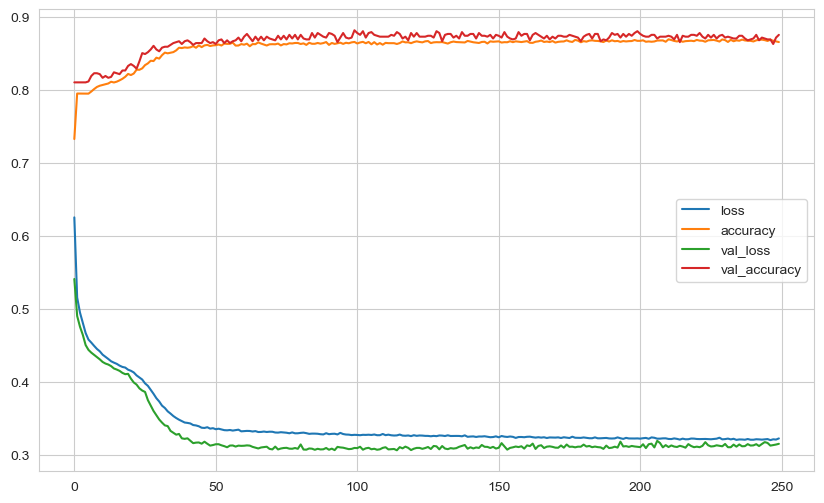

In [51]:
loss_df1.plot()
plt.show()

In [52]:
model.evaluate(X_test, y_test, verbose=0)

[0.33783578872680664, 0.8634999990463257]

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.33783578872680664
accuracy:  0.8634999990463257


In [54]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1508   85]
 [ 188  219]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1593
           1       0.72      0.54      0.62       407

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.77      2000
weighted avg       0.85      0.86      0.86      2000



In [55]:
# We don't seem to have an overfit.
# Precision and recall for those churned are off

#### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

63/63 [==============================] - 0s 1ms/step


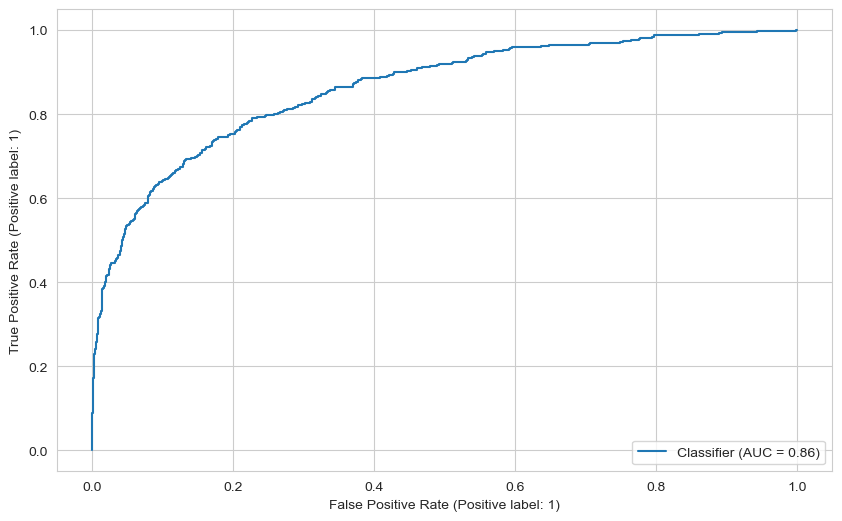

In [56]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [57]:
roc_auc_score(y_test, y_pred_proba)

0.8621996418606588

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [58]:
from keras.utils import to_categorical
from sklearn.utils import class_weight


# Compute class weights on the training data
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

classes = np.unique(y_train)
weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {k: v for k, v in zip(classes, weights)}


In [59]:
class_weight_dict

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [60]:
model2 = Sequential()

model2.add(Dense(18, activation="relu", input_dim=X_train.shape[1])) # 12 * 1.5 rounded to 18
model2.add(Dense(9, activation="relu")) # 18/2=9
model2.add(Dense(4, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)

In [61]:
model2.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=250, verbose=1
)

Epoch 1/250
57/57 [==============================] - 2s 6ms/step - loss: 0.5865 - accuracy: 0.7279 - val_loss: 0.4909 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7947 - val_loss: 0.4712 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7947 - val_loss: 0.4632 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7947 - val_loss: 0.4577 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.7947 - val_loss: 0.4536 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7947 - val_loss: 0.4498 - val_accuracy: 0.8100
Epoch 7/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7947 - val_loss: 0.4458 - val_accuracy: 0.8100
Epoch 8/250
5

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [62]:
loss_df2= pd.DataFrame(model2.history.history)
loss_df2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.586,0.728,0.491,0.810
1,0.496,0.795,0.471,0.810
2,0.484,0.795,0.463,0.810
3,0.477,0.795,0.458,0.810
4,0.471,0.795,0.454,0.810


<Axes: >

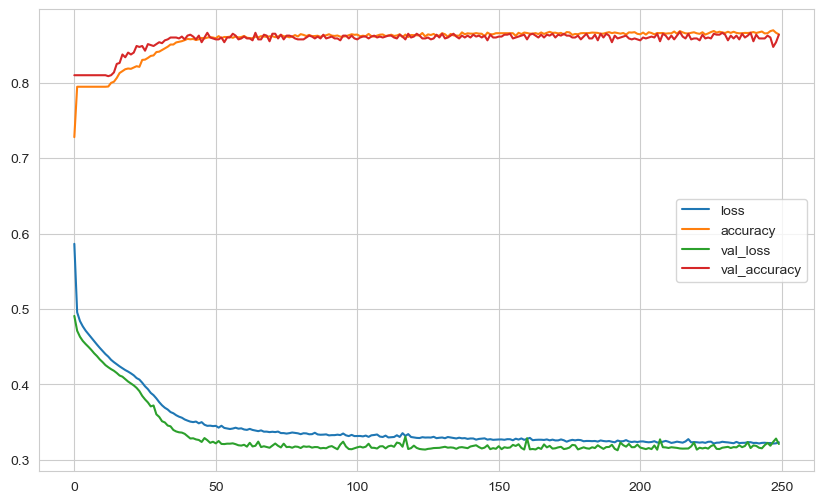

In [63]:
loss_d2 = pd.DataFrame(model2.history.history)
loss_d2.plot()

In [64]:
model2.evaluate(X_test, y_test, verbose=0)

[0.33873021602630615, 0.8610000014305115]

In [65]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.33873021602630615
accuracy:  0.8610000014305115


In [66]:
y_pred = model2.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1548   45]
 [ 233  174]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



#### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

63/63 [==============================] - 0s 1ms/step


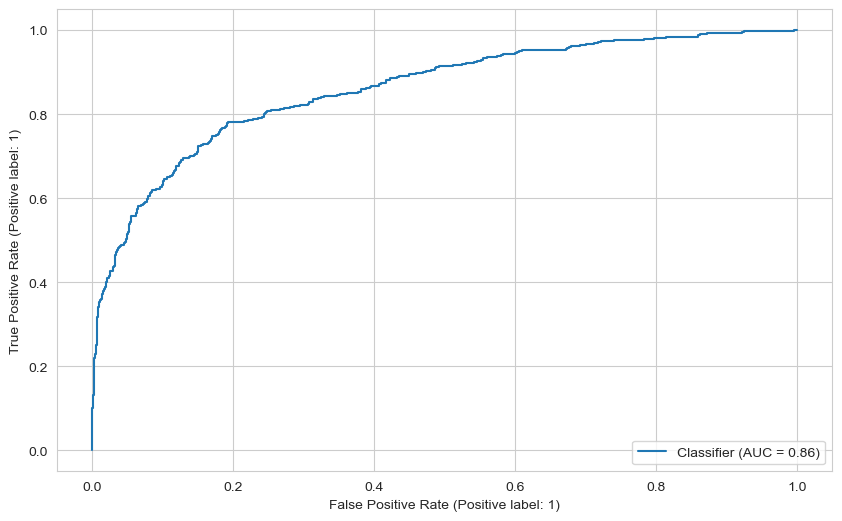

In [67]:
y_pred_proba = model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [68]:
roc_auc_score(y_test, y_pred_proba)

0.8594171984002493

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [69]:
from tensorflow.keras.optimizers import Adam

In [70]:
model3 = Sequential()

model3.add(Dense(18, activation="relu", input_dim=X_train.shape[1])) # 12 * 1.5=18
model3.add(Dense(9, activation="relu"))
model3.add(Dense(4, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model3.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)


In [71]:
model3.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=250,
    verbose=1,
)

Epoch 1/250
57/57 [==============================] - 1s 7ms/step - loss: 0.6522 - accuracy: 0.6768 - val_loss: 0.5182 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.7947 - val_loss: 0.4650 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7947 - val_loss: 0.4535 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.7947 - val_loss: 0.4496 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7989 - val_loss: 0.4278 - val_accuracy: 0.8175
Epoch 6/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.8114 - val_loss: 0.4160 - val_accuracy: 0.8250
Epoch 7/250
57/57 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8213 - val_loss: 0.3993 - val_accuracy: 0.8413
Epoch 8/250
5

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [72]:
loss_df3= pd.DataFrame(model3.history.history)
loss_df3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.652,0.677,0.518,0.810
1,0.493,0.795,0.465,0.810
2,0.476,0.795,0.454,0.810
3,0.464,0.795,0.450,0.810
4,0.452,0.799,0.428,0.817


<Axes: >

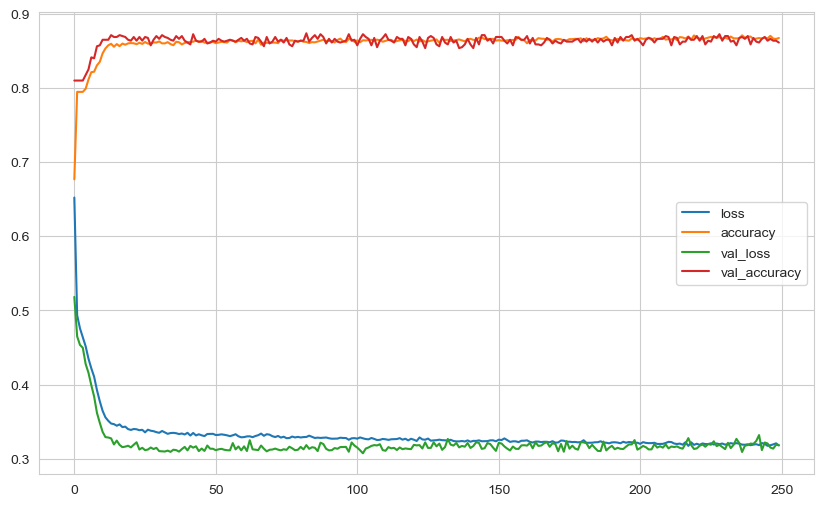

In [73]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot()

In [74]:
model3.evaluate(X_test, y_test, verbose=0)

[0.3357013761997223, 0.859000027179718]

In [75]:
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3357013761997223
accuracy:  0.859000027179718


In [76]:
y_pred = model3.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1507   86]
 [ 196  211]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.52      0.60       407

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



63/63 [==============================] - 0s 944us/step


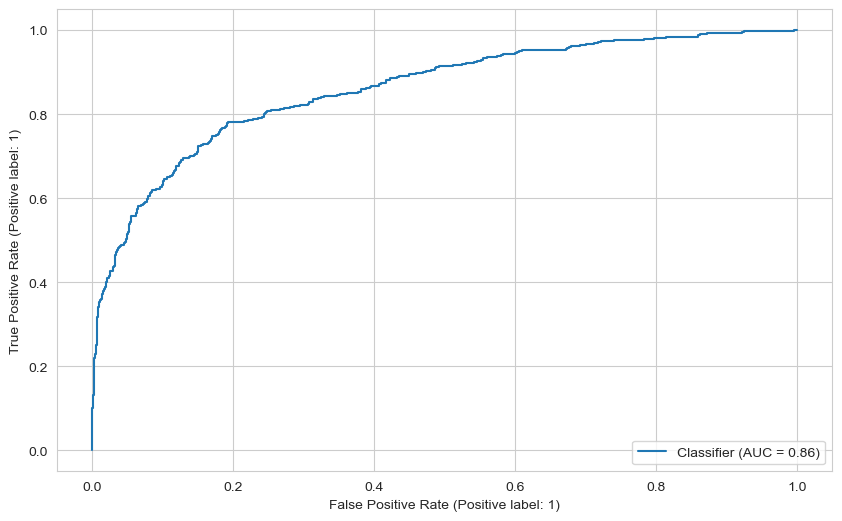

In [77]:
y_pred_proba = model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [78]:
roc_auc_score(y_test, y_pred_proba)

0.8594171984002493

#### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

63/63 [==============================] - 0s 1ms/step


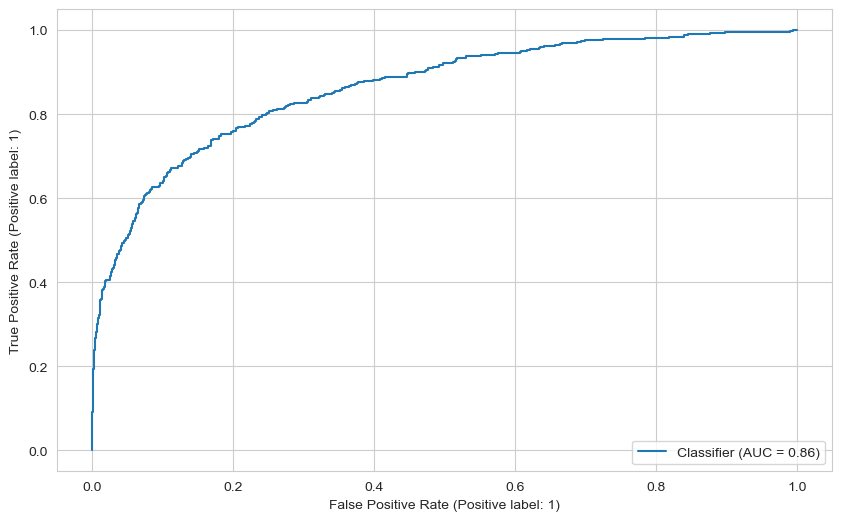

In [79]:
y_pred_proba = model3.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [80]:
roc_auc_score(y_test, y_pred_proba)

0.8622690487097266

### Add Dropout Layer

In [81]:
from tensorflow.keras.layers import Dropout

In [82]:
model4 = Sequential()

model4.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model4.add(Dropout(0.5))

model4.add(Dense(9, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(4, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model4.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)


In [83]:
model4.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=250,
    verbose=1,
)

Epoch 1/250
57/57 [==============================] - 1s 5ms/step - loss: 0.6964 - accuracy: 0.6858 - val_loss: 0.6460 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7932 - val_loss: 0.5518 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7944 - val_loss: 0.5219 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7946 - val_loss: 0.5019 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7947 - val_loss: 0.4898 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7947 - val_loss: 0.4862 - val_accuracy: 0.8100
Epoch 7/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7947 - val_loss: 0.4801 - val_accuracy: 0.8100
Epoch 8/250
5

In [84]:
loss_df4= pd.DataFrame(model4.history.history)
loss_df4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.696,0.686,0.646,0.810
1,0.623,0.793,0.552,0.810
2,0.569,0.794,0.522,0.810
3,0.549,0.795,0.502,0.810
4,0.536,0.795,0.490,0.810


<Axes: >

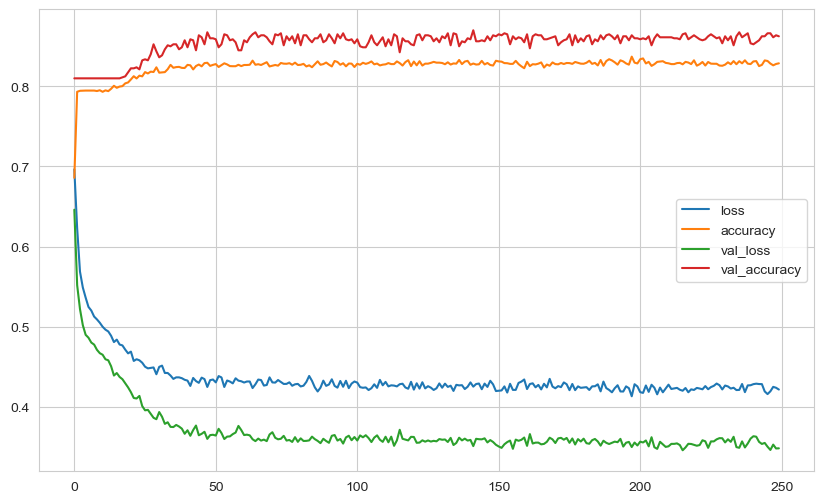

In [85]:
loss_df4 = pd.DataFrame(model4.history.history)
loss_df4.plot()

In [86]:
loss, accuracy = model4.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3664766252040863
accuracy:  0.8519999980926514


In [87]:
y_pred = model4.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1575   18]
 [ 278  129]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1593
           1       0.88      0.32      0.47       407

    accuracy                           0.85      2000
   macro avg       0.86      0.65      0.69      2000
weighted avg       0.86      0.85      0.82      2000



63/63 [==============================] - 0s 1ms/step


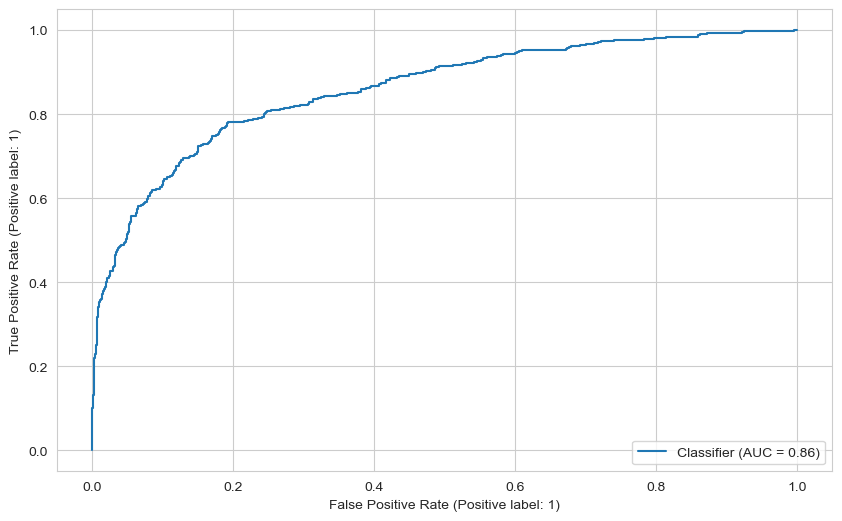

In [88]:
y_pred_proba = model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [89]:
roc_auc_score(y_test, y_pred_proba)

0.8594171984002493

### Add Early Stop

#### Monitor the "val_loss" as metric

In [90]:
model5 = Sequential()

model5.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dropout(0.5))

model5.add(Dense(9, activation="relu"))
model5.add(Dropout(0.5))

model5.add(Dense(4, activation="relu"))
model5.add(Dropout(0.5))

model5.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)


In [91]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

# here I enter val_loss as the monitor parameter

In [92]:
model5.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/250
57/57 [==============================] - 1s 5ms/step - loss: 0.6266 - accuracy: 0.7897 - val_loss: 0.5148 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7947 - val_loss: 0.4912 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.7947 - val_loss: 0.4801 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7947 - val_loss: 0.4753 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7947 - val_loss: 0.4637 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7947 - val_loss: 0.4600 - val_accuracy: 0.8100
Epoch 7/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7947 - val_loss: 0.4561 - val_accuracy: 0.8100
Epoch 8/250
5

In [93]:
loss_df5= pd.DataFrame(model5.history.history)
loss_df5.head()

,loss,accuracy,val_loss,val_accuracy
0,0.627,0.790,0.515,0.810
1,0.558,0.795,0.491,0.810
2,0.532,0.795,0.480,0.810
3,0.526,0.795,0.475,0.810
4,0.510,0.795,0.464,0.810


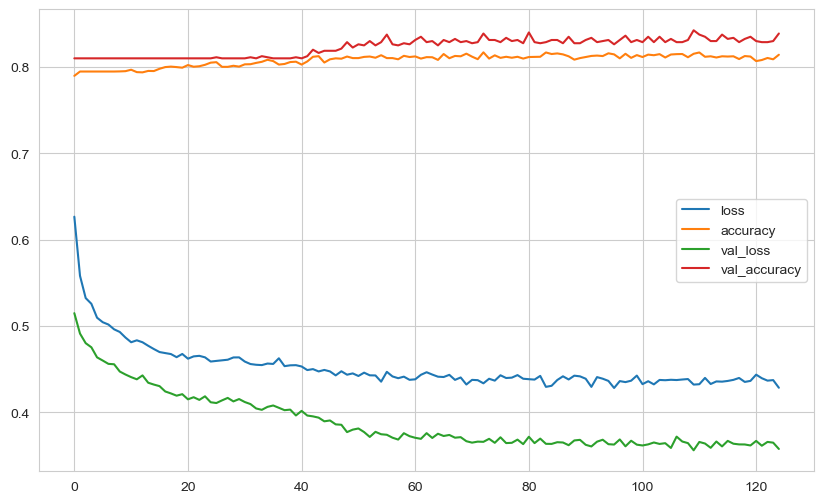

In [94]:
loss_df5 = pd.DataFrame(model5.history.history)
loss_df5.plot()
plt.show()

In [95]:
loss, accuracy = model5.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3720852732658386
accuracy:  0.8320000171661377


In [96]:
y_pred = model5.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1588    5]
 [ 331   76]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1593
           1       0.94      0.19      0.31       407

    accuracy                           0.83      2000
   macro avg       0.88      0.59      0.61      2000
weighted avg       0.85      0.83      0.78      2000



#### Monitor the "val_recall" as metric

In [97]:
model6 = Sequential()

model6.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model6.add(Dropout(0.5))

model6.add(Dense(9, activation="relu"))
model6.add(Dropout(0.5))

model6.add(Dense(4, activation="relu"))
model6.add(Dropout(0.5))

model6.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model6.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)


In [98]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

# here I enter val_recall as the monitor parameter

In [99]:
model6.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/250
57/57 [==============================] - 2s 7ms/step - loss: 0.6370 - accuracy: 0.7404 - val_loss: 0.5274 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7933 - val_loss: 0.4942 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.7947 - val_loss: 0.4872 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.7944 - val_loss: 0.4824 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7940 - val_loss: 0.4757 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 4ms/step - loss: 0.5169 - accuracy: 0.7940 - val_loss: 0.4776 - val_accuracy: 0.8100
Epoch 7/250
57/57 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.7946 - val_loss: 0.4694 - val_accuracy: 0.8100
Epoch 8/250
5

In [100]:
# Tensorflow throws the warning that val_recall is not an available metric

In [101]:
loss_df6= pd.DataFrame(model6.history.history)
loss_df6.head()

,loss,accuracy,val_loss,val_accuracy
0,0.637,0.740,0.527,0.810
1,0.552,0.793,0.494,0.810
2,0.532,0.795,0.487,0.810
3,0.526,0.794,0.482,0.810
4,0.522,0.794,0.476,0.810


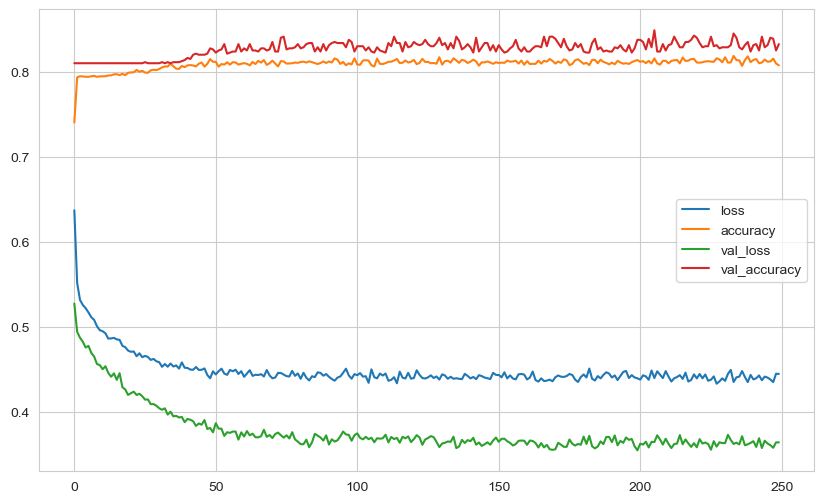

In [102]:
loss_df6 = pd.DataFrame(model6.history.history)
loss_df6.plot()
plt.show()

In [103]:
loss, accuracy = model6.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.38524749875068665
accuracy:  0.8165000081062317


In [104]:
y_pred = model6.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1591    2]
 [ 365   42]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1593
           1       0.95      0.10      0.19       407

    accuracy                           0.82      2000
   macro avg       0.88      0.55      0.54      2000
weighted avg       0.84      0.82      0.75      2000



## Optuna

In [105]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [106]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [107]:
trial_metric = "accuracy"
batch_size = 128


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=1000,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [108]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-11-13 00:43:39,388] A new study created in memory with name: no-name-8e850f9d-c710-48f8-b4be-2acdbac85a81


Restoring model weights from the end of the best epoch: 178.
Epoch 193: early stopping


[I 2023-11-13 00:44:05,885] Trial 0 finished with value: 0.8600000143051147 and parameters: {'n_units1': 72, 'n_units2': 107, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 7.690921880338424e-05, 'w0': 3.323246422276201, 'w1': 2.6638770701962815}. Best is trial 0 with value: 0.8600000143051147.


Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping


[I 2023-11-13 00:44:14,479] Trial 1 finished with value: 0.8519999980926514 and parameters: {'n_units1': 113, 'n_units2': 113, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0018872831458119404, 'w0': 0.28283950156979093, 'w1': 0.05384653918295493}. Best is trial 0 with value: 0.8600000143051147.


Restoring model weights from the end of the best epoch: 85.
Epoch 100: early stopping


[I 2023-11-13 00:44:28,559] Trial 2 finished with value: 0.8615000247955322 and parameters: {'n_units1': 103, 'n_units2': 24, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00043983213220189383, 'w0': 4.541907970012266, 'w1': 3.437491926190284}. Best is trial 2 with value: 0.8615000247955322.


Restoring model weights from the end of the best epoch: 16.
Epoch 31: early stopping


[I 2023-11-13 00:44:32,981] Trial 3 finished with value: 0.8640000224113464 and parameters: {'n_units1': 110, 'n_units2': 8, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.049843861756001154, 'w0': 2.2609024485645355, 'w1': 1.3568499237889853}. Best is trial 3 with value: 0.8640000224113464.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-11-13 00:44:36,242] Trial 4 finished with value: 0.5830000042915344 and parameters: {'n_units1': 113, 'n_units2': 38, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.013064453989955828, 'w0': 0.0515972531237362, 'w1': 0.9551211269506285}. Best is trial 3 with value: 0.8640000224113464.
[I 2023-11-13 00:47:24,545] Trial 5 finished with value: 0.5964999794960022 and parameters: {'n_units1': 123, 'n_units2': 86, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00018664713194808054, 'w0': 0.24662211814185167, 'w1': 0.9881341602591853}. Best is trial 3 with value: 0.8640000224113464.


Restoring model weights from the end of the best epoch: 32.
Epoch 47: early stopping


[I 2023-11-13 00:47:34,858] Trial 6 finished with value: 0.8479999899864197 and parameters: {'n_units1': 43, 'n_units2': 60, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.07055775291600716, 'w0': 2.543646031480231, 'w1': 0.546047143348431}. Best is trial 3 with value: 0.8640000224113464.


Restoring model weights from the end of the best epoch: 45.
Epoch 60: early stopping


[I 2023-11-13 00:47:44,660] Trial 7 finished with value: 0.8320000171661377 and parameters: {'n_units1': 93, 'n_units2': 27, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06266142884825938, 'w0': 1.614053548273312, 'w1': 0.05726984856178355}. Best is trial 3 with value: 0.8640000224113464.
[I 2023-11-13 00:50:25,234] Trial 8 finished with value: 0.796500027179718 and parameters: {'n_units1': 119, 'n_units2': 87, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0003476314927821058, 'w0': 3.4937864786027273, 'w1': 4.209814680523041}. Best is trial 3 with value: 0.8640000224113464.


Restoring model weights from the end of the best epoch: 458.
Epoch 473: early stopping


[I 2023-11-13 00:51:35,259] Trial 9 finished with value: 0.8600000143051147 and parameters: {'n_units1': 14, 'n_units2': 95, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 7.211137476246161e-05, 'w0': 0.049599248655852156, 'w1': 0.05548406542261104}. Best is trial 3 with value: 0.8640000224113464.


{'n_units1': 110,
 'n_units2': 8,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.049843861756001154,
 'w0': 2.2609024485645355,
 'w1': 1.3568499237889853}

In [109]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/1000
57/57 [==============================] - 1s 8ms/step - loss: 0.5354 - recall: 0.0041 - val_loss: 0.5148 - val_recall: 0.0000e+00
Epoch 2/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.4522 - recall: 0.1752 - val_loss: 0.4626 - val_recall: 0.0789
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.4168 - recall: 0.2585 - val_loss: 0.4119 - val_recall: 0.5395
Epoch 4/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3937 - recall: 0.3627 - val_loss: 0.6167 - val_recall: 0.6776
Epoch 5/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.3877 - recall: 0.3857 - val_loss: 0.3567 - val_recall: 0.4276
Epoch 6/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3810 - recall: 0.3694 - val_loss: 0.6499 - val_recall: 0.6579
Epoch 7/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.3776 - recall: 0.3917 - val_loss: 0.3436 - val_recall: 0.2961
Epoch 8/1000
57/57 [==========

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [110]:
history = model.history.history

<Axes: >

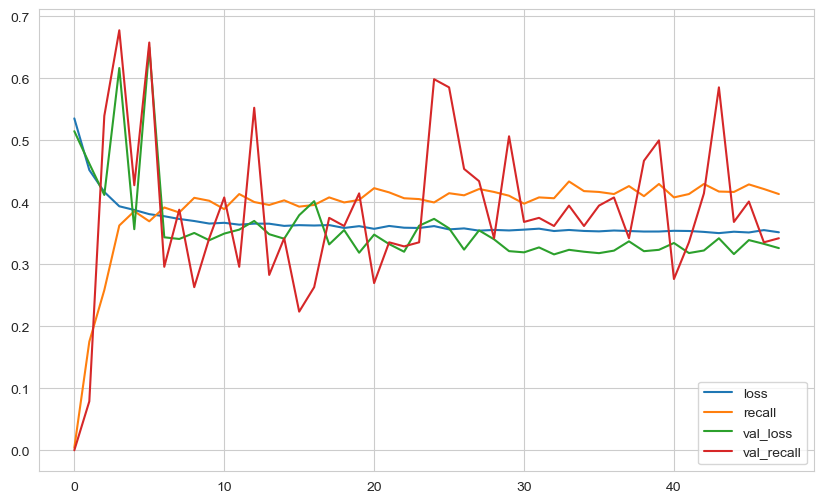

In [111]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [112]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.34766608476638794
accuracy:  0.4078623950481415


In [113]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 916us/step
[[1552   41]
 [ 241  166]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



63/63 [==============================] - 0s 973us/step


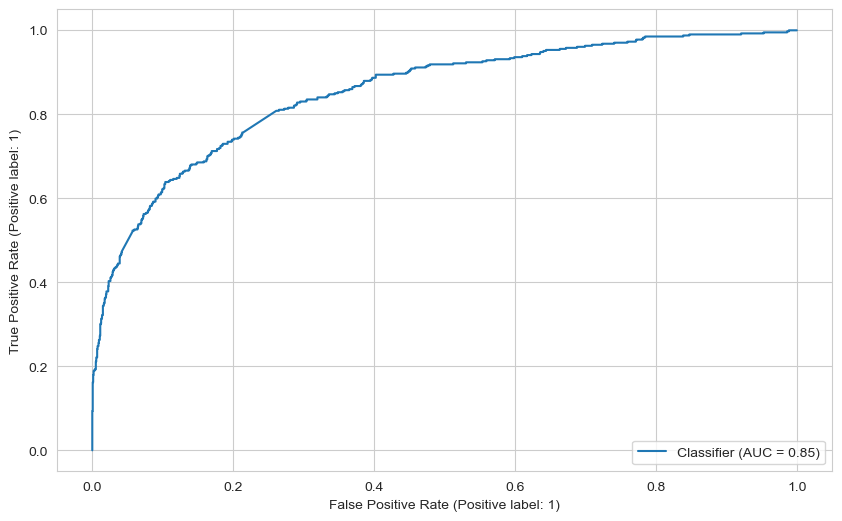

In [114]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [115]:
roc_auc_score(y_test, y_pred_proba)

0.8530726412082346

# Final Model and Model Deployment

In [116]:
import pickle
pickle.dump(scaler, open("scaler_churn", "wb"))

In [117]:
model.save("model_churn.h5")

## Loading Model and Scaler

In [118]:
from tensorflow.keras.models import load_model

In [119]:
model_churn = load_model("model_churn.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [120]:
single_customer = df.drop("Exited", axis=1).iloc[25:26, :]
single_customer

,Geography_France,Geography_Germany,Geography_Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
25,1.000,0.000,0.000,1,577,25,3,0.000,2,0,1,124508.290


In [121]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.454     ,
        0.09459459, 0.3       , 0.        , 0.33333333, 0.        ,
        1.        , 0.622543  ]])

In [122]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 87ms/step


array([[0]])

In [123]:
model_churn.predict(single_customer)

1/1 [==============================] - 0s 33ms/step


array([[0.00349188]], dtype=float32)

In [124]:
df["Exited"].iloc[26]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___